Alzheimer Disease and Healthy Aging Data In US数据分析
=

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv(r'D:\Item\Desktop\数据挖掘\Alzheimer Disease and Healthy Aging Data In US.csv',low_memory=False)
data.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

Sample_Size一列全空，先做删除处理

In [4]:
data = data.drop(columns=["Sample_Size"])

Geolocation为收集数据的地点的经纬度，为了后面转换为数值数据进行分析，转换为两列Longitude、 Latitude

In [5]:
"POINT (-157.8577494 21.30485044)".split('(')[1].split(')')[0].split(' ')

['-157.8577494', '21.30485044']

In [6]:
data['Longitude'] = 0.0
data['Latitude'] = 0.0
for i, row in data[['Geolocation']].iterrows():
    if pd.isnull(row[0]):
        data.loc[i, 'Longitude'] = np.nan
        data.loc[i, 'Latitude'] = np.nan 
    else:
        data.loc[i, 'Longitude'] = row[0].split('(')[1].split(')')[0].split(' ')[0]
        data.loc[i, 'Latitude'] = row[0].split('(')[1].split(')')[0].split(' ')[1]

In [7]:
data[['Geolocation', 'Longitude', 'Latitude']].head(20)

,Geolocation,Longitude,Latitude
0,POINT (-157.8577494 21.30485044),-157.8577494,21.30485044
1,POINT (-114.36373 43.68263001),-114.36373,43.68263001
2,POINT (-114.36373 43.68263001),-114.36373,43.68263001
3,POINT (-114.36373 43.68263001),-114.36373,43.68263001
4,POINT (-86.14996019 39.76691045),-86.14996019,39.76691045
5,POINT (-93.81649056 42.46940091),-93.81649056,42.46940091
6,POINT (-93.81649056 42.46940091),-93.81649056,42.46940091
7,POINT (-93.81649056 42.46940091),-93.81649056,42.46940091
8,POINT (-93.81649056 42.46940091),-93.81649056,42.46940091
9,POINT (-93.81649056 42.46940091),-93.81649056,42.46940091


In [8]:
data = data.drop(labels='Geolocation', axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

数据摘要和可视化
=
数据摘要
-
观察可知Data_Value、Data_Value_Alt、Low_Confidence_Limit、High_Confidence_Limit、Longitude、Latitude为数值属性，其余为标称属性  
 

### 标称属性  
给出每个可能取值的频数 

In [10]:
col_nominal_attribute = ['Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Longitude', 'Latitude']
col_numeric_attribute = list(set(list(data)).difference(set(col_nominal_attribute)))

In [11]:
for col in col_numeric_attribute:
    frequency=data[col].value_counts()
    print(frequency)
    print('===========================================================')

Overall Health                         71694
Screenings and Vaccines                46867
Nutrition/Physical Activity/Obesity    24851
Cognitive Decline                      19180
Caregiving                             18671
Mental Health                          16600
Smoking and Alcohol Use                16599
Name: Class, dtype: int64
US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
OK      3526
SD      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      3349
WA      3

### 数值属性  
给出5数概括及缺失值的个数  

查看各列数据类型，将数值属性数据类型转换为可计算类型float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

In [13]:
data[col_nominal_attribute].head(5)

,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Longitude,Latitude
0,26.3,26.3,23.9,29,-157.8577494,21.30485044
1,24.0,24.0,21.2,27,-114.36373,43.68263001
2,35.7,35.7,32.5,39.1,-114.36373,43.68263001
3,4.8,4.8,4,5.5,-114.36373,43.68263001
4,13.7,13.7,12.1,15.4,-86.14996019,39.76691045


In [14]:
data[col_nominal_attribute] = data[col_nominal_attribute].apply(pd.to_numeric, errors='coerce')
# data[['Low_Confidence_Limit']] = data[['Low_Confidence_Limit']].apply(pd.to_numeric, errors='coerce')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

输出5数概括

In [16]:
for col in col_nominal_attribute:
    print(data[col].astype('float').describe())
    print('===========================================================')

count    144629.000000
mean         37.341956
std          25.183017
min           0.000000
25%          15.300000
50%          32.500000
75%          56.800000
max         100.000000
Name: Data_Value, dtype: float64
count    144629.000000
mean         37.341956
std          25.183017
min           0.000000
25%          15.300000
50%          32.500000
75%          56.800000
max         100.000000
Name: Data_Value_Alt, dtype: float64
count    144453.000000
mean         32.736785
std          24.231769
min           0.000000
25%          12.000000
50%          26.900000
75%          49.100000
max          99.600000
Name: Low_Confidence_Limit, dtype: float64
count    144453.000000
mean         42.244436
std          26.172356
min           1.400000
25%          19.000000
50%          38.500000
75%          64.700000
max         100.000000
Name: High_Confidence_Limit, dtype: float64
count    191413.000000
mean        -89.695086
std          33.911316
min        -157.857749
25%        -100

### 数据可视化  
使用直方图、盒图等检查数据分布及离群点

array([[<Axes: title={'center': 'Data_Value'}>,
        <Axes: title={'center': 'Data_Value_Alt'}>],
       [<Axes: title={'center': 'Low_Confidence_Limit'}>,
        <Axes: title={'center': 'High_Confidence_Limit'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>]], dtype=object)

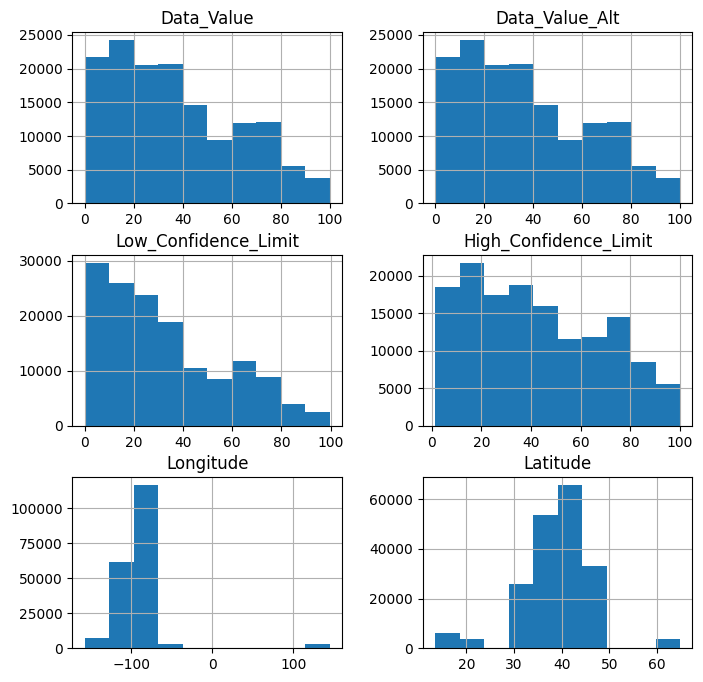

In [17]:
data[col_nominal_attribute].hist(figsize=(8, 8))

<Axes: >

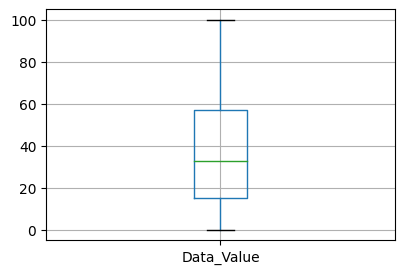

In [18]:
data[[col_nominal_attribute[0]]].boxplot(figsize=(4.5, 3))

<Axes: >

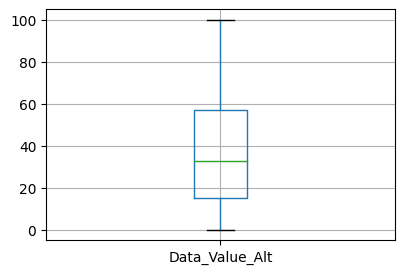

In [19]:
data[[col_nominal_attribute[1]]].boxplot(figsize=(4.5, 3))

<Axes: >

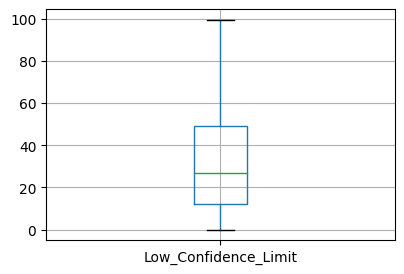

In [20]:
data[[col_nominal_attribute[2]]].boxplot(figsize=(4.5, 3))

<Axes: >

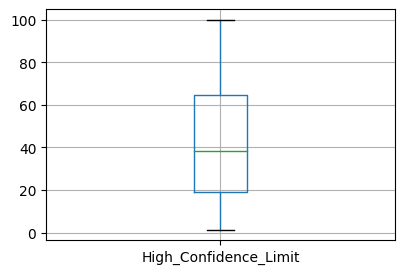

In [21]:
data[[col_nominal_attribute[3]]].boxplot(figsize=(4.5, 3))

<Axes: >

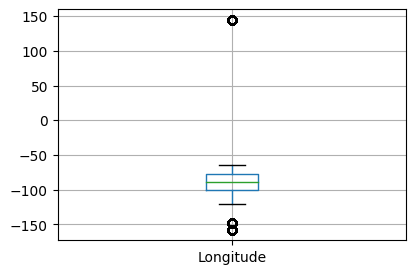

In [22]:
data[[col_nominal_attribute[4]]].boxplot(figsize=(4.5, 3))

<Axes: >

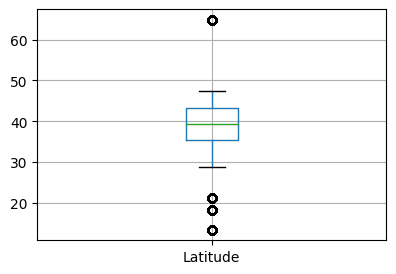

In [23]:
data[[col_nominal_attribute[5]]].boxplot(figsize=(4.5, 3))

**从以上直方图以及盒图可以看出：**  
Data_Value不符合正态分布情况，没有出现离群值，分布呈左偏态  
Data_Value_Alt不符合正态分布情况，没有出现离群值，分布呈左偏态    
Low_Confidence_Limit不符合正态分布情况，没有出现离群值，分布呈左偏态  
High_Confidence_Limit不符合正态分布情况，没有出现离群值，分布呈左偏态
Longitude不符合正态分布情况，有极少离群值，且集中在较小值一侧，分布呈右偏态  
Latitude基本符合正态分布情况，有极少离群值

# 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:  
1. 将缺失部分剔除  
2. 用最高频率值来填补缺失值  
3. 通过属性的相关关系来填补缺失值  
4. 通过数据对象之间的相似性来填补缺失值  

In [24]:
data.isnull().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
Datasource                       0
Class                            0
Topic                            0
Question                         0
Data_Value_Unit                  0
DataValueTypeID                  0
Data_Value_Type                  0
Data_Value                   69833
Data_Value_Alt               69833
Low_Confidence_Limit         70009
High_Confidence_Limit        70009
StratificationCategory1          0
Stratification1                  0
StratificationCategory2      27669
Stratification2              27669
ClassID                          0
TopicID                          0
QuestionID                       0
LocationID                       0
StratificationCategoryID1        0
StratificationID1                0
StratificationCategoryID2        0
StratificationID2                0
Longitude                    23049
Latitude            

观察缺失情况，整体是成对缺失的情况，首先对Data_Value、Data_Value_Alt、Low_Confidence_Limit、High_Confidence_Limit进行处理

In [25]:
data[data['Data_Value'].isnull()][['Data_Value', 'Data_Value_Alt','Low_Confidence_Limit', 'High_Confidence_Limit']]


,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit
32,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
...,...,...,...,...
214456,NaN,NaN,NaN,NaN
214457,NaN,NaN,NaN,NaN
214458,NaN,NaN,NaN,NaN
214459,NaN,NaN,NaN,NaN


可以看到该四项属性几乎都是同时缺失的情况，并且无法根据其他属性获取近似值，因此将该四项属性同时缺失的数据做剔除处理

In [26]:
data=data.dropna(axis=0, how='all', inplace=False, subset=['Data_Value', 'Data_Value_Alt','Low_Confidence_Limit', 'High_Confidence_Limit'])
data.isnull().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
Datasource                       0
Class                            0
Topic                            0
Question                         0
Data_Value_Unit                  0
DataValueTypeID                  0
Data_Value_Type                  0
Data_Value                       0
Data_Value_Alt                   0
Low_Confidence_Limit           176
High_Confidence_Limit          176
StratificationCategory1          0
Stratification1                  0
StratificationCategory2      27596
Stratification2              27596
ClassID                          0
TopicID                          0
QuestionID                       0
LocationID                       0
StratificationCategoryID1        0
StratificationID1                0
StratificationCategoryID2        0
StratificationID2                0
Longitude                    22720
Latitude            

查看剩下的176个缺失数据情况，选择根据属性的相关关系用0填充

In [27]:
data[data['Low_Confidence_Limit'].isnull()][['Data_Value', 'Data_Value_Alt','Low_Confidence_Limit', 'High_Confidence_Limit']]

,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit
78097,0.0,0.0,NaN,NaN
78187,0.0,0.0,NaN,NaN
78433,0.0,0.0,NaN,NaN
78581,0.0,0.0,NaN,NaN
78773,0.0,0.0,NaN,NaN
...,...,...,...,...
210562,0.0,0.0,NaN,NaN
210645,0.0,0.0,NaN,NaN
210703,0.0,0.0,NaN,NaN
211059,0.0,0.0,NaN,NaN


In [28]:
data[['Low_Confidence_Limit','High_Confidence_Limit']] = data[['Low_Confidence_Limit','High_Confidence_Limit']].fillna(0)
data.isnull().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
Datasource                       0
Class                            0
Topic                            0
Question                         0
Data_Value_Unit                  0
DataValueTypeID                  0
Data_Value_Type                  0
Data_Value                       0
Data_Value_Alt                   0
Low_Confidence_Limit             0
High_Confidence_Limit            0
StratificationCategory1          0
Stratification1                  0
StratificationCategory2      27596
Stratification2              27596
ClassID                          0
TopicID                          0
QuestionID                       0
LocationID                       0
StratificationCategoryID1        0
StratificationID1                0
StratificationCategoryID2        0
StratificationID2                0
Longitude                    22720
Latitude            

然后对StratificationCategory2，Stratification2处理  
可以根据未缺失的StratificationCategoryID2、StratificationID2与之的对应关系进行填充

In [29]:
dic_Stratification2 = {'WHT': 'White, non-Hispanic','HIS': 'Hispanic','BLK': 'Black, non-Hispanic','NAA': 'Native Am/Alaskan Native','ASN': 'Asian/Pacific Islander','FEMALE': 'Female','MALE': 'Male'}
dic_StratificationCategory2 = {'RACE': 'Race/Ethnicity', 'GENDER': 'Gender'}

如果StratificationCategoryID2、StratificationID2的值为overall，代表StratificationCategory2，Stratification2为空，使用最高频数填充

In [30]:
for col in ['StratificationCategory2','Stratification2']:
    value = data[[col]].value_counts().index[0][0]
    data[col] = data[col].fillna(value)
data.isnull().sum()

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
Datasource                       0
Class                            0
Topic                            0
Question                         0
Data_Value_Unit                  0
DataValueTypeID                  0
Data_Value_Type                  0
Data_Value                       0
Data_Value_Alt                   0
Low_Confidence_Limit             0
High_Confidence_Limit            0
StratificationCategory1          0
Stratification1                  0
StratificationCategory2          0
Stratification2                  0
ClassID                          0
TopicID                          0
QuestionID                       0
LocationID                       0
StratificationCategoryID1        0
StratificationID1                0
StratificationCategoryID2        0
StratificationID2                0
Longitude                    22720
Latitude            

通过数据对象之间的相似性来填补缺失值，剩下缺失的经纬度信息，可以对于对应location的经纬度数据求平均，然后进行填充。如果该地区对应的经纬度缺失，则直接剔除

In [31]:
for i, row in data[['Longitude', 'LocationAbbr']].iterrows():
    if pd.isnull(row['Longitude']):
        Longitude_mean = data[data.LocationAbbr==row['LocationAbbr']]['Longitude'].mean()
        Latitude_mean = data[data.LocationAbbr==row['LocationAbbr']]['Latitude'].mean()
        if pd.isnull(Longitude_mean):
            data.drop(i, inplace=True)
        else:    
            data.loc[i, 'Longitude'] = Longitude_mean
            data.loc[i, 'Latitude'] = Latitude_mean
data.isnull().sum()

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Datasource                   0
Class                        0
Topic                        0
Question                     0
Data_Value_Unit              0
DataValueTypeID              0
Data_Value_Type              0
Data_Value                   0
Data_Value_Alt               0
Low_Confidence_Limit         0
High_Confidence_Limit        0
StratificationCategory1      0
Stratification1              0
StratificationCategory2      0
Stratification2              0
ClassID                      0
TopicID                      0
QuestionID                   0
LocationID                   0
StratificationCategoryID1    0
StratificationID1            0
StratificationCategoryID2    0
StratificationID2            0
Longitude                    0
Latitude                     0
dtype: int64

此时所有缺失值已填充完毕

In [32]:
data.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Longitude,Latitude
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL,-157.857749,21.30485
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL,-114.363730,43.68263
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL,-114.363730,43.68263
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL,-114.363730,43.68263
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE,-86.149960,39.76691
